In [1]:
from sympy import init_printing, Matrix, symbols
from IPython.display import Image
from warnings import filterwarnings

In [2]:
init_printing(use_latex="mathjax")
filterwarnings("ignore")

# Projection matrices and least squares

## Least squares

* Consider from the previous lecture the three data point in the plane
$$ ({t}_{i},{y}_{i}) =(1,1), (2,2),(3,2) $$
* From this we need to construct a straight line
* This could be helpful say in, statistics (remember, though in statistics we might have to get rid of statistical outliers)
* Nonetheless (view image above) we note that we have a straight line in slope-intercept form
$$ {y}={C}+{Dt} $$
* On the line at *t* values of 1, 2, and 3 we will have
$$ {y}_{1}={C}+{D}=1 \\ {y}_{2}={C}+{2D}=2 \\ {y}_{3}={C}+{3D}=2 $$
* The actual *y* values at these *t* values are 1, 2, and 2, though
* We are thus including an error of
$$ \delta{y} \\ { \left( { e }_{ 1 } \right)  }^{ 2 }={ \left[ \left( C+D \right) -1 \right]  }^{ 2 }\\ { \left( { e }_{ 2 } \right)  }^{ 2 }={ \left[ \left( C+2D \right) -2 \right]  }^{ 2 }\\ { \left( { e }_{ 3 } \right)  }^{ 2 }={ \left[ \left( C+3D \right) -2 \right]  }^{ 2 } $$
* Since some are positive and some are negative (actual values below or above the line), we simply determine the square (which will always be positive)
* Adding the (three in our example here) squares we have the sum total of the error (which is actuall just the sqautre of the distance between the line and actual *y* values)
* The line will be the best fit when this error sum is at a minimum (hence *least squares*)
* We can do this with calculus or with linear algebra
* For calculus we take the partial derivatives of both unknowns and set to zero
* For linear algebra we project orthogonally onto the columnspace (hence minimizing the error)
    * Note that the solution **b** does not exist in the columnspace (it is not a linear combination of the columns)

### Calculus method

* We'll create a function *f*(C,D) and successively take the partial derivatives of both variables and set it to zero
* We fill then have two equation with two unknowns to solve (which is easy enough to do manually or by simple linear algebra and row reduction)

In [3]:
C, D = symbols("C D")

In [4]:
e1_squared = ((C + D) - 1) ** 2
e2_squared = ((C + 2 * D) - 2) ** 2
e3_squared = ((C + 3 * D) - 2) ** 2
f = e1_squared + e2_squared + e3_squared
f

           2                2                2
(C + D - 1)  + (C + 2⋅D - 2)  + (C + 3⋅D - 2) 

In [5]:
f.expand()  # Expanding the expression

   2                       2           
3⋅C  + 12⋅C⋅D - 10⋅C + 14⋅D  - 22⋅D + 9

* Doing the partial derivatives will be
$$ f\left( C,D \right) =3{ C }^{ 2 }+12CD-10C+14{ D }^{ 2 }-22D+9\\ \frac { \partial f }{ \partial C } =6C+12D-10=0\\ \frac { \partial f }{ \partial D } =12C+28D-22=0 $$

In [6]:
f.diff(C)  # Taking the partial derivative with respect to C

6⋅C + 12⋅D - 10

In [7]:
f.diff(D)  # Taking the partial derivative with respect to D

12⋅C + 28⋅D - 22

* Setting both equal to zero (and creating a simple augmented matrix) we get
$$ 6C+12D-10=0\\ 12C+28D-22=0\\ \therefore \quad 6C+12D=10\\ \therefore \quad 12C+28D=22 $$

In [8]:
A_augm = Matrix([[6, 12, 10], [12, 28, 22]])
A_augm

⎡6   12  10⎤
⎢          ⎥
⎣12  28  22⎦

In [9]:
A_augm.rref()  # Doing a Gauss-Jordan elimination to reduced row echelon form

⎛⎡1  0  2/3⎤        ⎞
⎜⎢         ⎥, (0, 1)⎟
⎝⎣0  1  1/2⎦        ⎠

* We now have a solution
$$ {y}=\frac{2}{3} + \frac{1}{2}{t}$$

### Linear algebra

* We note that we can construct the following
$$ {C}+{1D}={1} \\ {C}+{2D}={2} \\ {C}+{3D}={2} \\ {C}\begin{bmatrix} 1 \\ 1\\ 1 \end{bmatrix}+{D}\begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}=\begin{bmatrix} 1 \\ 2 \\ 2 \end{bmatrix} \\ A\mathbf { x } =\mathbf { b } \\ \begin{bmatrix} 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{bmatrix}\begin{bmatrix} C \\ D \end{bmatrix}=\begin{bmatrix} 1 \\ 2 \\ 2 \end{bmatrix} $$
* **b** is not in the columnspace of A and we have to do orthogonal projection
$$ { A }^{ T }A\hat { x } ={ A }^{ T }\mathbf { b } \\ \hat { x } ={ \left( { A }^{ T }A \right)  }^{ -1 }{ A }^{ T }\mathbf { b }  $$

In [10]:
A = Matrix([[1, 1], [1, 2], [1, 3]])
b = Matrix([1, 2, 2])
A, b  # Showing the two matrices

⎛⎡1  1⎤  ⎡1⎤⎞
⎜⎢    ⎥  ⎢ ⎥⎟
⎜⎢1  2⎥, ⎢2⎥⎟
⎜⎢    ⎥  ⎢ ⎥⎟
⎝⎣1  3⎦  ⎣2⎦⎠

In [11]:
x_hat = (A.transpose() * A).inv() * A.transpose() * b
x_hat

⎡2/3⎤
⎢   ⎥
⎣1/2⎦

* Again, we get the same values for C and D

* Remember the following
$$ \mathbf{b} = \mathbf{p}+\mathbf{e} $$
* **p** and **e** are perpendicular
* Indeed **p** is in the columnspace of A and **e** is perpendicular to the columspace (or any vector in the columnspace)

## Example problem

### Example problem 1

* Find the quadratic (second order polynomial) equation through the origin, with the following data points: (1,1), (2,5) and (-1,-2)

#### Solution

* Let's just think about a quadratic equation in *y* and *t*
$$ {y}={c}_{1} +{C}{t}+{D}{t}^{2} $$
* Through the origin (0,0) means *y* = 0 and *t* = 0, thus we have
$$ {0}={c}_{1} +{C}{0}+{D}{0}^{2} \\ {c}_{1}=0 \\ {y}={C}{t}+{D}{t}^{2} $$

* This gives us three equation for our three data points
$$ C\left( 1 \right) +D{ \left( 1 \right)  }^{ 2 }=1\\ C\left( 2 \right) +D{ \left( 2 \right)  }^{ 2 }=5\\ C\left( -1 \right) +D{ \left( -1 \right)  }^{ 2 }=-2\\ C\begin{bmatrix} 1 \\ 2 \\ -1 \end{bmatrix}+D\begin{bmatrix} 1 \\ 4 \\ 1 \end{bmatrix}=\begin{bmatrix} 1 \\ 5 \\ -2 \end{bmatrix}\\ A=\begin{bmatrix} 1 & 1 \\ 2 & 4 \\ -1 & 1 \end{bmatrix}\\ \mathbf { x } =\begin{bmatrix} C \\ D \end{bmatrix}\\ \mathbf { b } =\begin{bmatrix} 1 \\ 5 \\ -2 \end{bmatrix} $$

* Clearly **b** is not in the columnspace of A and we have to project orthogonally onto the columnspace using
$$ \hat { x } ={ \left( { A }^{ T }A \right)  }^{ -1 }{ A }^{ T }\mathbf { b } $$

In [12]:
A = Matrix([[1, 1], [2, 4], [-1, 1]])
b = Matrix([1, 5, -2])
x_hat = (A.transpose() * A).inv() * A.transpose() * b
x_hat

⎡ 41 ⎤
⎢ ── ⎥
⎢ 22 ⎥
⎢    ⎥
⎣5/22⎦

* Here's a simple plot of the equation

In [13]:
import matplotlib.pyplot as plt  # The graph plotting module
import numpy as np  # The numerical mathematics module

%matplotlib inline

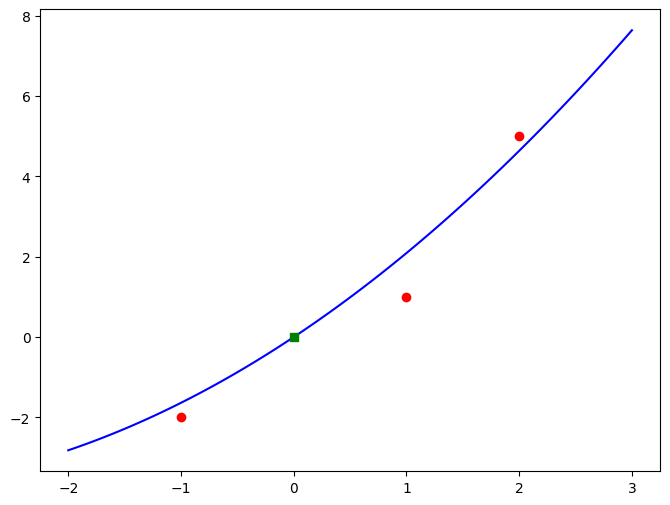

In [14]:
x = np.linspace(-2, 3, 100)  # Creating 100 x-values
y = (41 / 22) * x + (5 / 22) * x**2  # From the equation above
plt.figure(figsize=(8, 6))  # Creating a plot of the indicated size
plt.plot(
    x, y, "b-"
)  # Plot the equation above , in essence 100 little plots using small segmnets of blue lines
plt.plot(1, 1, "ro")  # Plot the point in a red dot
plt.plot(2, 5, "ro")
plt.plot(-1, -2, "ro")
plt.plot(0, 0, "gs")  # Plot the origin as a green square
plt.show();  # Create the plot